# Lab 1: Image recognition
You will find the complete lab manual in this file. Some exercises require written answers, while others require coding.

**Important:** Do **not** define functions directly in this notebook. Instead, save them in the `functions.py` file and call them from the code cells in this notebook.

### Submission Requirements:
Your final lab submission should include:
1. Your edited **notebook file** (`.ipynb`).
2. Your **`functions.py`** file containing all function definitions.
3. A **HTML printout** of the executed notebook with all outputs visible: File → Save and export Notebook As → HTML

First, we'll import a set of python packages you'll need for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob

## Task 1: Blood cell classification with a mean template classifier

Load `data/bloodcell.npz`, which is a set of patches containing blood cells.

In [2]:
data = np.load('data/bloodcells/training_data.npz', allow_pickle=True)
pos_patches = data['fg_patches'] # positive examples
neg_patches = data['bg_patches'] # negative examples
nbr_pos = len(pos_patches) # number of positive patches
nbr_neg = len(neg_patches) # number of negative patches
print(f'Number of samples: {nbr_pos+nbr_neg}')

Number of samples: 400


### Task 1.1
Display some positive and negative examples. Based on the displayed examples, how do you think the positive and negative examples were selected?

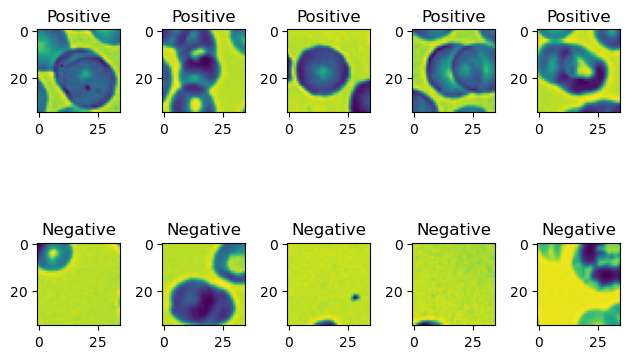

In [3]:
# Your code here
np.random.seed(20)

f, ax = plt.subplots(2, 5)

pos_start = np.random.randint(0, 196)
end_start = np.random.randint(0, 196)

for i in range(5):
    ax[0, i].imshow(pos_patches[pos_start + i])
    ax[0, i].set_title("Positive")

for i in range(5):
    ax[1, i].imshow(neg_patches[end_start + i])
    ax[1, i].set_title("Negative")

plt.tight_layout()
plt.show()

**Your answer:** We think if the image is selected as a positive example, it should contain a complete and round cell with clear and well-defined edges. Additionally, the cell should be approximately centered within the image. Otherwise, the image will be considered as a negative example.

### Task 1.2
Compute an average cell from the positive examples, and display the average cell.

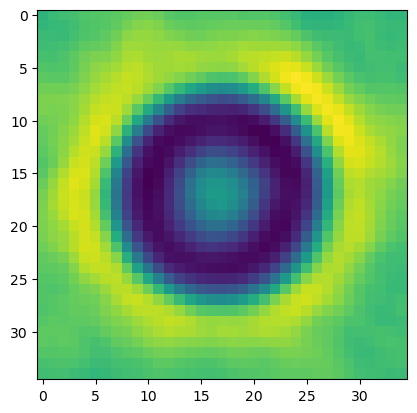

In [4]:
w = np.zeros_like(pos_patches[0]) # Initialize w with zeros based on the first positive patch shape

# Your code here

for pos in pos_patches:
    w += pos

w = w / nbr_pos

plt.imshow(w)

### Task 1.3
Make a function that creates a covariance filter based on the set of positive examples. Place it in your `functions.py` file.

In [5]:
def create_covariance_filter(pos_patches):
    """
    Creates a covariance filter from a set of positive patches.
    
    Parameters:
    pos_patches (numpy array): Array of positive patches.
    
    Returns:
    numpy array: The computed covariance filter.
    """
    nbr_pos = len(pos_patches)
    w = np.zeros_like(pos_patches[0])
    
    # Your code here
    
    return w

### Task 1.4
Test the filter on the positive and negative examples with  $\tau = 0$. How many misclassified examples do you get?

In [6]:
from functions import create_covariance_filter

# Your code here
w = create_covariance_filter(pos_patches)

pos_misclassified = 0
neg_misclassified = 0

for pos in pos_patches:
    pos_similarity = np.sum(pos * w)
    if pos_similarity < 0:
        pos_misclassified +=1

for neg in neg_patches:
    neg_similarity = np.sum(neg * w)
    if neg_similarity > 0:
        neg_misclassified +=1

print(neg_misclassified + pos_misclassified)

65


We get 65 misclassified examples.

 ### Task 1.5
 Given a set of training images and a fixed $w$, can you suggest an efficient method to find the best $\tau$?

 **Your answer:** We try different values of $\tau$ and compute the number of misclassified examples. Then we choose the best $\tau$ with the least misclassified examples.

### Task 1.6
Make a function that finds the threshold that gives the least amount of misclassified blood cells. Place it in your `functions.py` file.

In [7]:
def compute_threshold(pos_patches, neg_patches, w):
    """
    Computes the optimal threshold that minimizes misclassification.
    
    Parameters:
    pos_patches (numpy array): Foreground patches.
    neg_patches (numpy array): Background patches.
    w (numpy array): The covariance filter.
    
    Returns:
    float: Optimal threshold for classification.
    """   
    ...
    
    return thr

### Task 1.7 
Modify `compute_threshold` such that it also computes and returns the precision and recall, as well as the confusion matrix. Also modify it in `functions.py` accordingly.

In [8]:
def compute_threshold(pos_patches, neg_patches, w):
    """
    Computes the optimal threshold that minimizes misclassification.
    
    Parameters:
    pos_patches (numpy array): Foreground patches.
    neg_patches (numpy array): Background patches.
    w (numpy array): The covariance filter.
    
    Returns:
    tuple: (thr, precision, recall, confusion_matrix)
    """
    
    ...
    
    return thr, precision, recall, conf_matrix

### Task 1.8
Use `compute_threshold` to compute the best threshold, the precision and the recall, as well as the confusion matrix. Explain what these numbers mean to someone who has not taken this course.

In [9]:
from functions import compute_threshold

# Your code here
thr, precision, recall, conf_matrix = compute_threshold(pos_patches, neg_patches, w)
print(thr, precision, recall, conf_matrix)

0.00030000000000000057 0.8552631578947368 0.975 [[195, 5], [33, 167]]


**Your answer:** The best threshold is a decision boundary to help us measure whether an image is positive. The precision is used to tell us how many images are correct among all the images classified as a positive example. And the recall tells us how many images are correct among all the images that belong to a positive example.

The confusion matrix shows the number of all true and false predictions in a matrix. The detailed format of the confusion matrix we output is:
|                  | Predicted Positive  | Predicted Negative  |
| -----------------|---------------------| --------------------|
| Actual Positive  | 195(TP) | 5(FN) |
| Actual Negative  | 33(FP) | 167(TN) |

### Task 1.9

Study some failure cases. Can you see why your classifier fails in these cases?

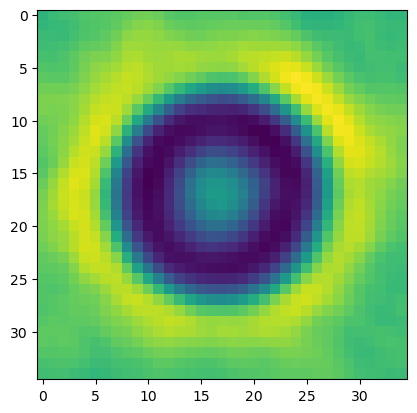

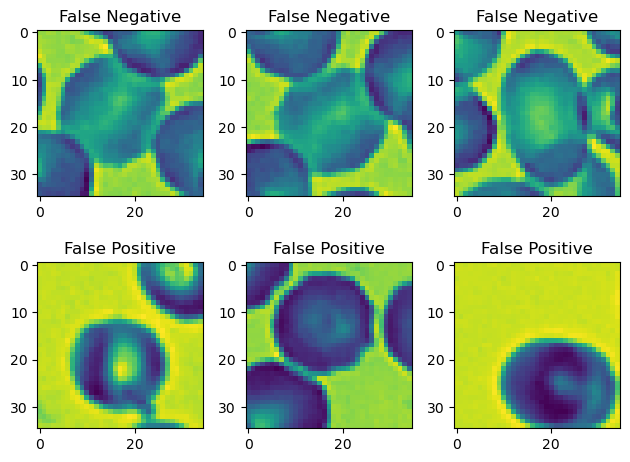

In [10]:
# Your code here
pos_misclassified_image = []
neg_misclassified_image = []

plt.imshow(w)

for pos in pos_patches:
    pos_similarity = np.sum(pos * w)
    if pos_similarity < thr:
        pos_misclassified_image.append(pos)

for neg in neg_patches:
    neg_similarity = np.sum(neg * w)
    if neg_similarity > thr:
        neg_misclassified_image.append(neg)

f, ax = plt.subplots(2, 3)

for i in range(3):
    ax[0, i].imshow(pos_misclassified_image[i])
    ax[0, i].set_title("False Negative")

for i in range(3):
    ax[1, i].imshow(neg_misclassified_image[i])
    ax[1, i].set_title("False Positive")

plt.tight_layout()
plt.show()

**Your answer:** We observe that the filter appears to represent a complete, round cell. Compared with it, the false-negative examples have many overlapping cells, which may confuse the classifier. The classifier may think of multiple overlapping cells as a single cell with an abnormal shape. On the other hand, each false-positive example has a complete and round cell, which leads to misclassification.

### Task 1.10

Load one of the images in the folder `data/bloodcells/test_images` using your function `read_as_grayscale` from lab 0. The image contains a
microscopic image with a lot of blood cells. In order to count the blood cells, apply your linear classiffer with a sliding dot product. Use the function `filter2D(image, -1, w)` from the package `cv2` and threshold the whole response image at once. Use the supplied `plot_overlay` to plot the results.

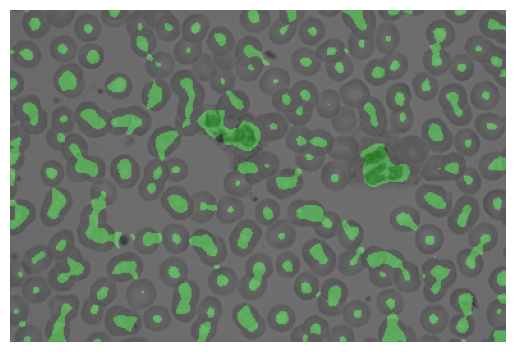

In [11]:
from functions import read_as_grayscale
from supplied import plot_overlay

# Your code here
blood_cell = read_as_grayscale('./data/bloodcells/test_images/088.png')

result = cv2.filter2D(blood_cell, -1, w)

binary_mask = np.zeros_like(result)
binary_mask[result > thr] = 1

plot_overlay(blood_cell, binary_mask)

### Task 1.11
You might want to change the threshold to decrease the number of false detections. Try to improve the results. What is problematic about the way that you generated the original threshold?

In [12]:
# Your code here
from functions import compute_threshold_improved

thr, precision, recall, conf_matrix = compute_threshold_improved(pos_patches, neg_patches, w)
print(thr, precision, recall, conf_matrix)

0.00032553801510250974 0.8590308370044053 0.975 [[195, 5], [32, 168]]


**Your answer:** We defined a threshold range and selected the best value by minimizing the number of misclassified images in the original threshold selection. However, both the range and the interval were manually determined, which may cause the best threshold to be missed. To improve the result, we try to define the range based on the maximum and minimum values of all the dot products.

### Task 1.12 
Write a function `strict_local_maxima` that computes the coordinates of all strict local maxima in the image. Place it in your `functions.py` file.

In [13]:
from scipy.ndimage import rank_filter

def strict_local_maxima(response, threshold):
    """
    Computes the coordinates of all strict local maxima in the response image.
    
    Parameters:
    response (numpy array): Input response image.
    threshold (float): Threshold for classification
    
    Returns:
    numpy array: 2 x n array with column coordinates in the first row
                 and row coordinates in the second row.
    """
   
    nhood_size = (3,3)
    next_best = rank_filter(response, -2, size=nhood_size) # Selecting the second highest pixel value from the neighborhood of each pixel.

    # Your code here
    
    return (col_coords, row_coords)

### Task 1.13

Apply `strict_local_maxima` to the image in task 1.10. Use the supplied `plot_overlay` to plot the results.

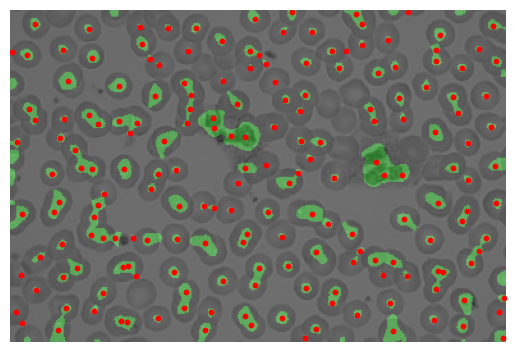

In [14]:
from functions import strict_local_maxima

# Your code here
blood_cell = read_as_grayscale('./data/bloodcells/test_images/088.png')

result = cv2.filter2D(blood_cell, -1, w)

strict_local_result = strict_local_maxima(result, thr)

binary_mask = np.zeros_like(result)
binary_mask[result > thr] = 1

plot_overlay(blood_cell, binary_mask, strict_local_result)

### Task 1.14
Make a function `detector` that uses your linear classifier with non-maximum suppression to detect cell centres in an image. Place it in your `functions.py` file.

In [15]:
import cv2

def detector(image, w, thr):
    """
    Detects cell centers in an image using a linear classifier and non-maximum suppression.
    
    Parameters:
    image (numpy array): Input image
    w (numpy array): The covariance filter
    thr (float): Threshold for classification

    Returns:
    numpy array: Cell centers.
    numpy array: Thresholded response image
    """

    # Your code here
    
    return centers, thresholded_response

### Task 1.15
Test your function `detector` on the images in `data/bloodcells/test_images`. Plot the results with `plot_overlay`.

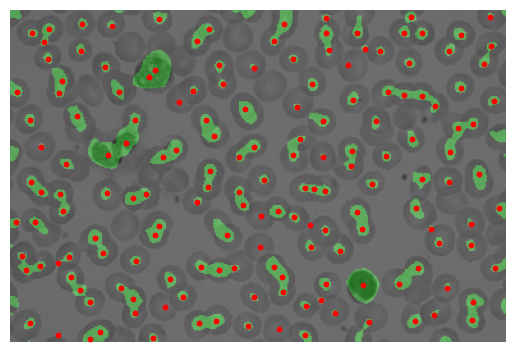

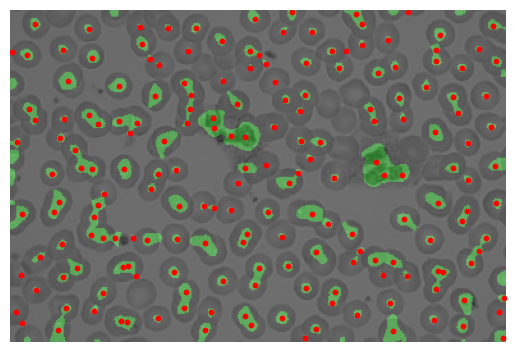

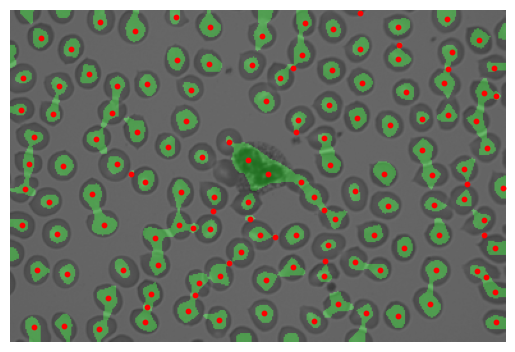

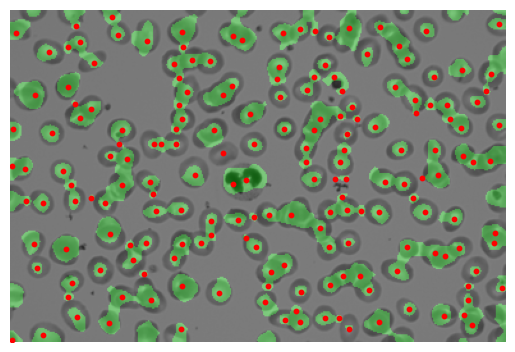

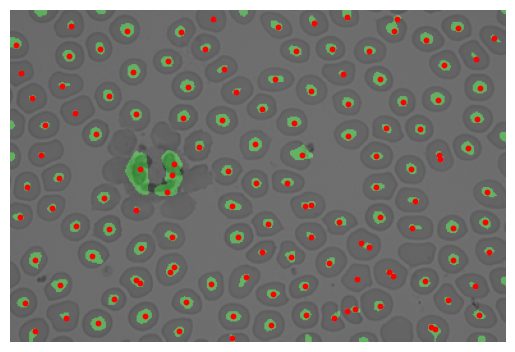

In [16]:
from functions import detector

# Load and process all test images
image_paths = glob('data/bloodcells/test_images/*.png')
for image_path in image_paths:

    # Your code here
    blood_cell = read_as_grayscale(image_path)
    centers, thresholded_response = detector(blood_cell, w, thr)
    plot_overlay(blood_cell, thresholded_response, centers)

## Task 2: Traffic sign classification with a mean template classifier
### Task 2.1 
Use the functions you implemented in task 1 to construct a traffic sign classifier from the training images in `data/trafficsigns/training_images`, and apply it on the test images in `data/trafficsigns/test_images`. Use your function `read_as_grayscale` from lab 0 to read the images. Display your results with `plot_overlay`.

0.000997872958136109 0.9083969465648855 0.8686131386861314 [[119, 18], [12, 94]]


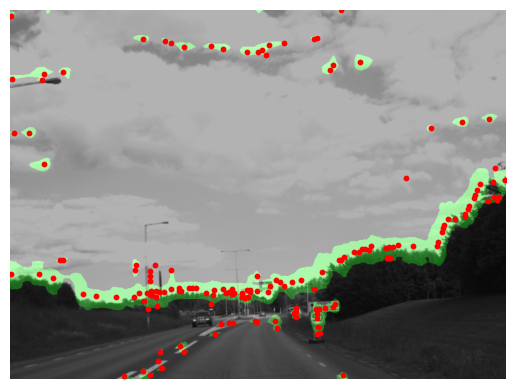

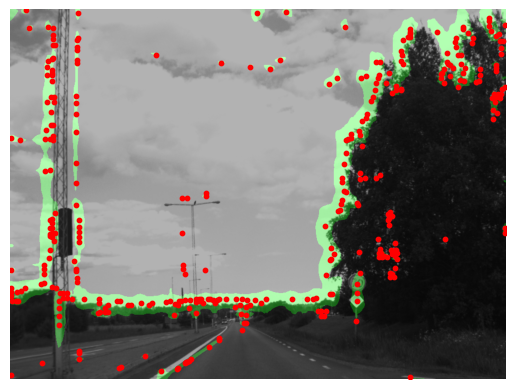

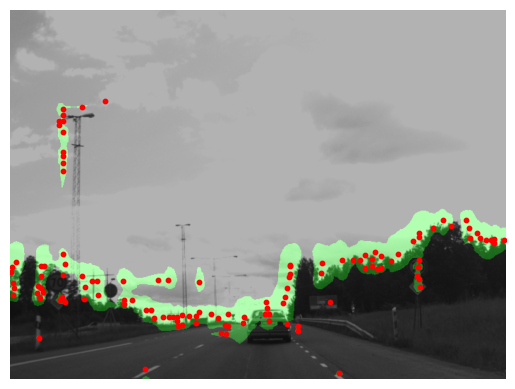

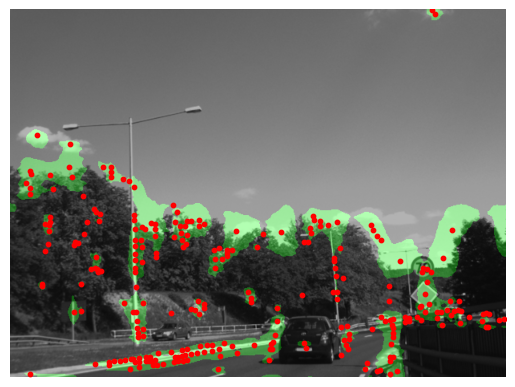

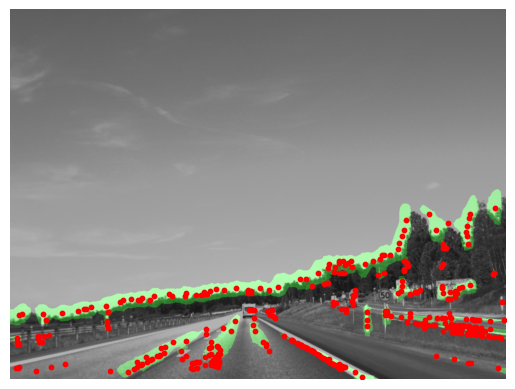

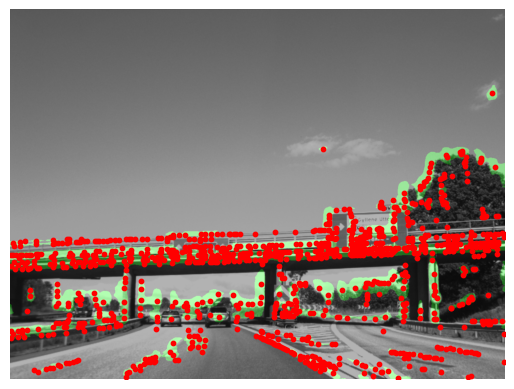

In [17]:
# Load training data
pos_patches = [read_as_grayscale(file) for file in glob('data/trafficsigns/speed/*.png')]
neg_patches = [read_as_grayscale(file) for file in glob('data/trafficsigns/bg/*.png')]

# Your code here
w = create_covariance_filter(pos_patches)
thr, precision, recall, conf_matrix = compute_threshold_improved(pos_patches, neg_patches, w)
print(thr, precision, recall, conf_matrix)

image_paths = glob('data/trafficsigns/test_images/*.png')
for image_path in image_paths:
    traffic = read_as_grayscale(image_path)
    centers, thresholded_response = detector(traffic, w, thr)
    plot_overlay(traffic, thresholded_response, centers)

### Task 2.2 
Modify the `detector` function you implemented in task 1 such that it works for RGB images as well (use all three color channels). Use the function `read_image` from lab 0 to read the images. Display your results with `plot_overlay`. Did your results improve?

0.0033597790191673676 0.9115646258503401 0.9781021897810219 [[134, 3], [13, 93]]


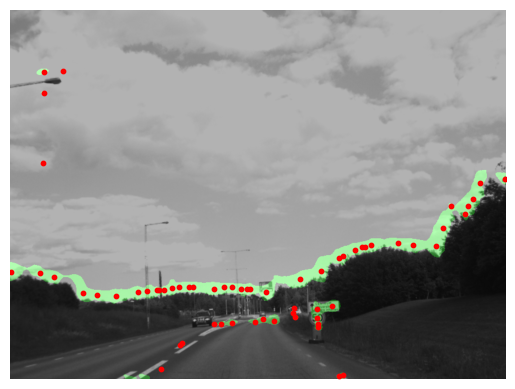

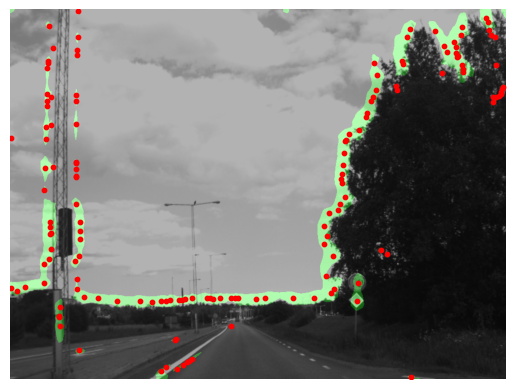

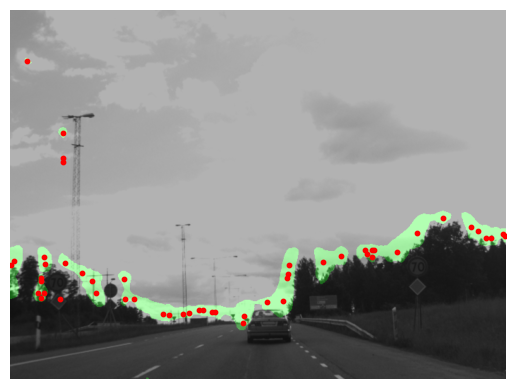

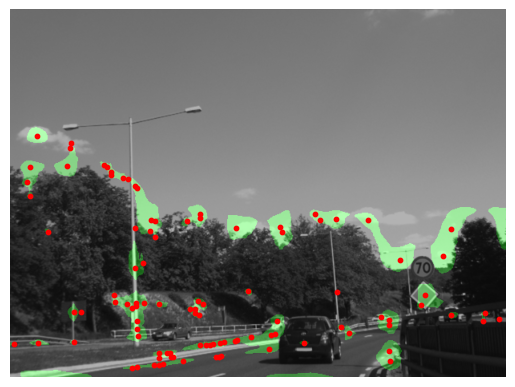

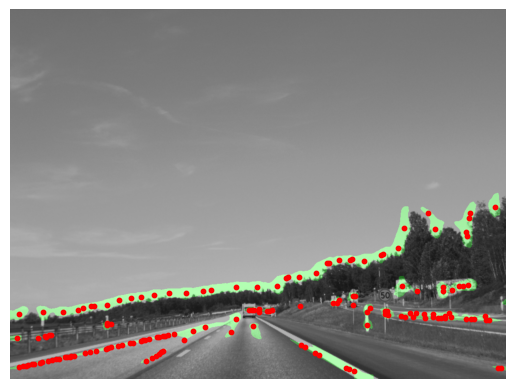

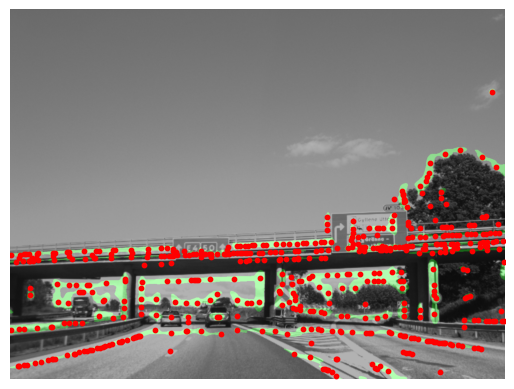

In [18]:
from functions import read_image

# Load training data
pos_patches = [read_image(file) for file in glob('data/trafficsigns/speed/*.png')]
neg_patches = [read_image(file) for file in glob('data/trafficsigns/bg/*.png')]
    
# Your code here
w = create_covariance_filter(pos_patches)
thr, precision, recall, conf_matrix = compute_threshold_improved(pos_patches, neg_patches, w)
print(thr, precision, recall, conf_matrix)

image_paths = glob('data/trafficsigns/test_images/*.png')
for image_path in image_paths:
    traffic = read_image(image_path)
    centers, thresholded_response = detector(traffic, w, thr)
    plot_overlay(traffic, thresholded_response, centers)

The results are improved, but they are not ideal.

## Task 3: Church classification with SIFT features

Use the supplied function `training_data` to extract SIFT descriptors from all training images in `data/churches/church_training/`. Use the supplied functions `extract_sift_features` and `match_descriptors` to create a function `classify_church` that tries to classify a new image by computing feature points for the new image, matching them to the features in the training data and letting each match vote for the correct church. Place it in your `functions.py` file. Try classifying all ten provided church images in `data/churches/church_test`. How many do you get right?

In [19]:
from supplied import extract_sift_features, match_descriptors

def classify_church(image_path, training_data):
    """
    Classifies a given image by matching its SIFT descriptors to stored training descriptors 
    and using a voting system to determine the most likely church.

    Parameters:
    -----------
    image_path (str): Path to input image to be classified.
    training_data (dict): Dictionary containing:
        - 'descriptors' (numpy array): Stored SIFT descriptors (128 × N).
        - 'labels' (numpy array): 1D array mapping each descriptor to a church label.
        - 'names' (list of str): List of church names corresponding to labels.

    Returns:
    --------
    int: Predicted label corresponding to the most likely church.
    """
    
    # Your code here.
    
    return label

In [20]:
from functions import classify_church
from supplied import create_training_data

# Load training data
training_data = create_training_data('data/churches/church_training/')

# Classify test images
test_images = glob('data/churches/church_test/*.jpg')

for image_path in test_images:
    label = classify_church(image_path, training_data)
    class_name = training_data['names'][label]
    print(f'Image {os.path.basename(image_path)} classified as {class_name}')



Image kalmar2.jpg classified as kalmar
Image sthlm2.jpg classified as kalmar
Image kalmar1.jpg classified as kalmar
Image sthlm1.jpg classified as sthlm
Image gbg2.jpg classified as gbg
Image gbg1.jpg classified as gbg
Image lund2.jpg classified as lund
Image lund1.jpg classified as lund
Image uppsala1.jpg classified as uppsala
Image uppsala2.jpg classified as uppsala


We got nine correct classifications.